In [122]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle
import tensorflow as tf


In [123]:
!pwd
tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#???

/media/jp/3aa509e1-f76e-48e5-bcb0-bc671881dca6/home/jp/orange-classifier
Num GPUs Available:  0


In [97]:
##Estudando os dados....
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 
#cv2.cvtColor() method is used to convert an image from one color space to another. There are more than 150
#color-space conversion methods available in OpenCV. We will use some of color space conversion codes below.
def load_rand():
    X=[]
    dir_path='./archive/dataset/dataset/train' #Diretorio dos dados de treinamento
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir) #rottenoranges vs freshoranges
        print(path_main)
        i=0
        for img_name in os.listdir(path_main): #Loop in each directory ['fresh', 'rotten']
            print(img_name)
            if i>=18: #Read 18 images each directory (36 in total)
                break
            img=cv2.imread(os.path.join(path_main,img_name)) #read image
            img=cv2.resize(img,(100,100)) #resize image 100x100 pixels
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image
            X.append(img)
            i+=1
    return X

In [98]:
X=load_rand()

100%|██████████| 2/2 [00:00<00:00, 22.16it/s]

rottenoranges
./archive/dataset/dataset/train/rottenoranges
rotated_by_45_Screen Shot 2018-06-12 at 11.47.08 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.36.14 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.41.35 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.40.51 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.26.44 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.26.07 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.29.36 PM.png
Screen Shot 2018-06-12 at 11.29.14 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.41.35 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.24.37 PM.png
Screen Shot 2018-06-12 at 11.45.17 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.25.11 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.40.42 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.26.18 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.34.13 PM.png
translation_Screen Shot 2018-06-12 at 11.41.48 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.38.26 PM.png
rotated_by_45_Scre

In [99]:
X=np.array(X)
X.shape #36 linhas de imagens de 100x100 pixels com profundidade 3 (RGB)
#onde R é Vermelho, G é Verde e B é Azul

(36, 100, 100, 3)

In [100]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'freshoranges'] #categorias.
        
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//18])
        plt.show()
    else:
        print('Cannot plot')

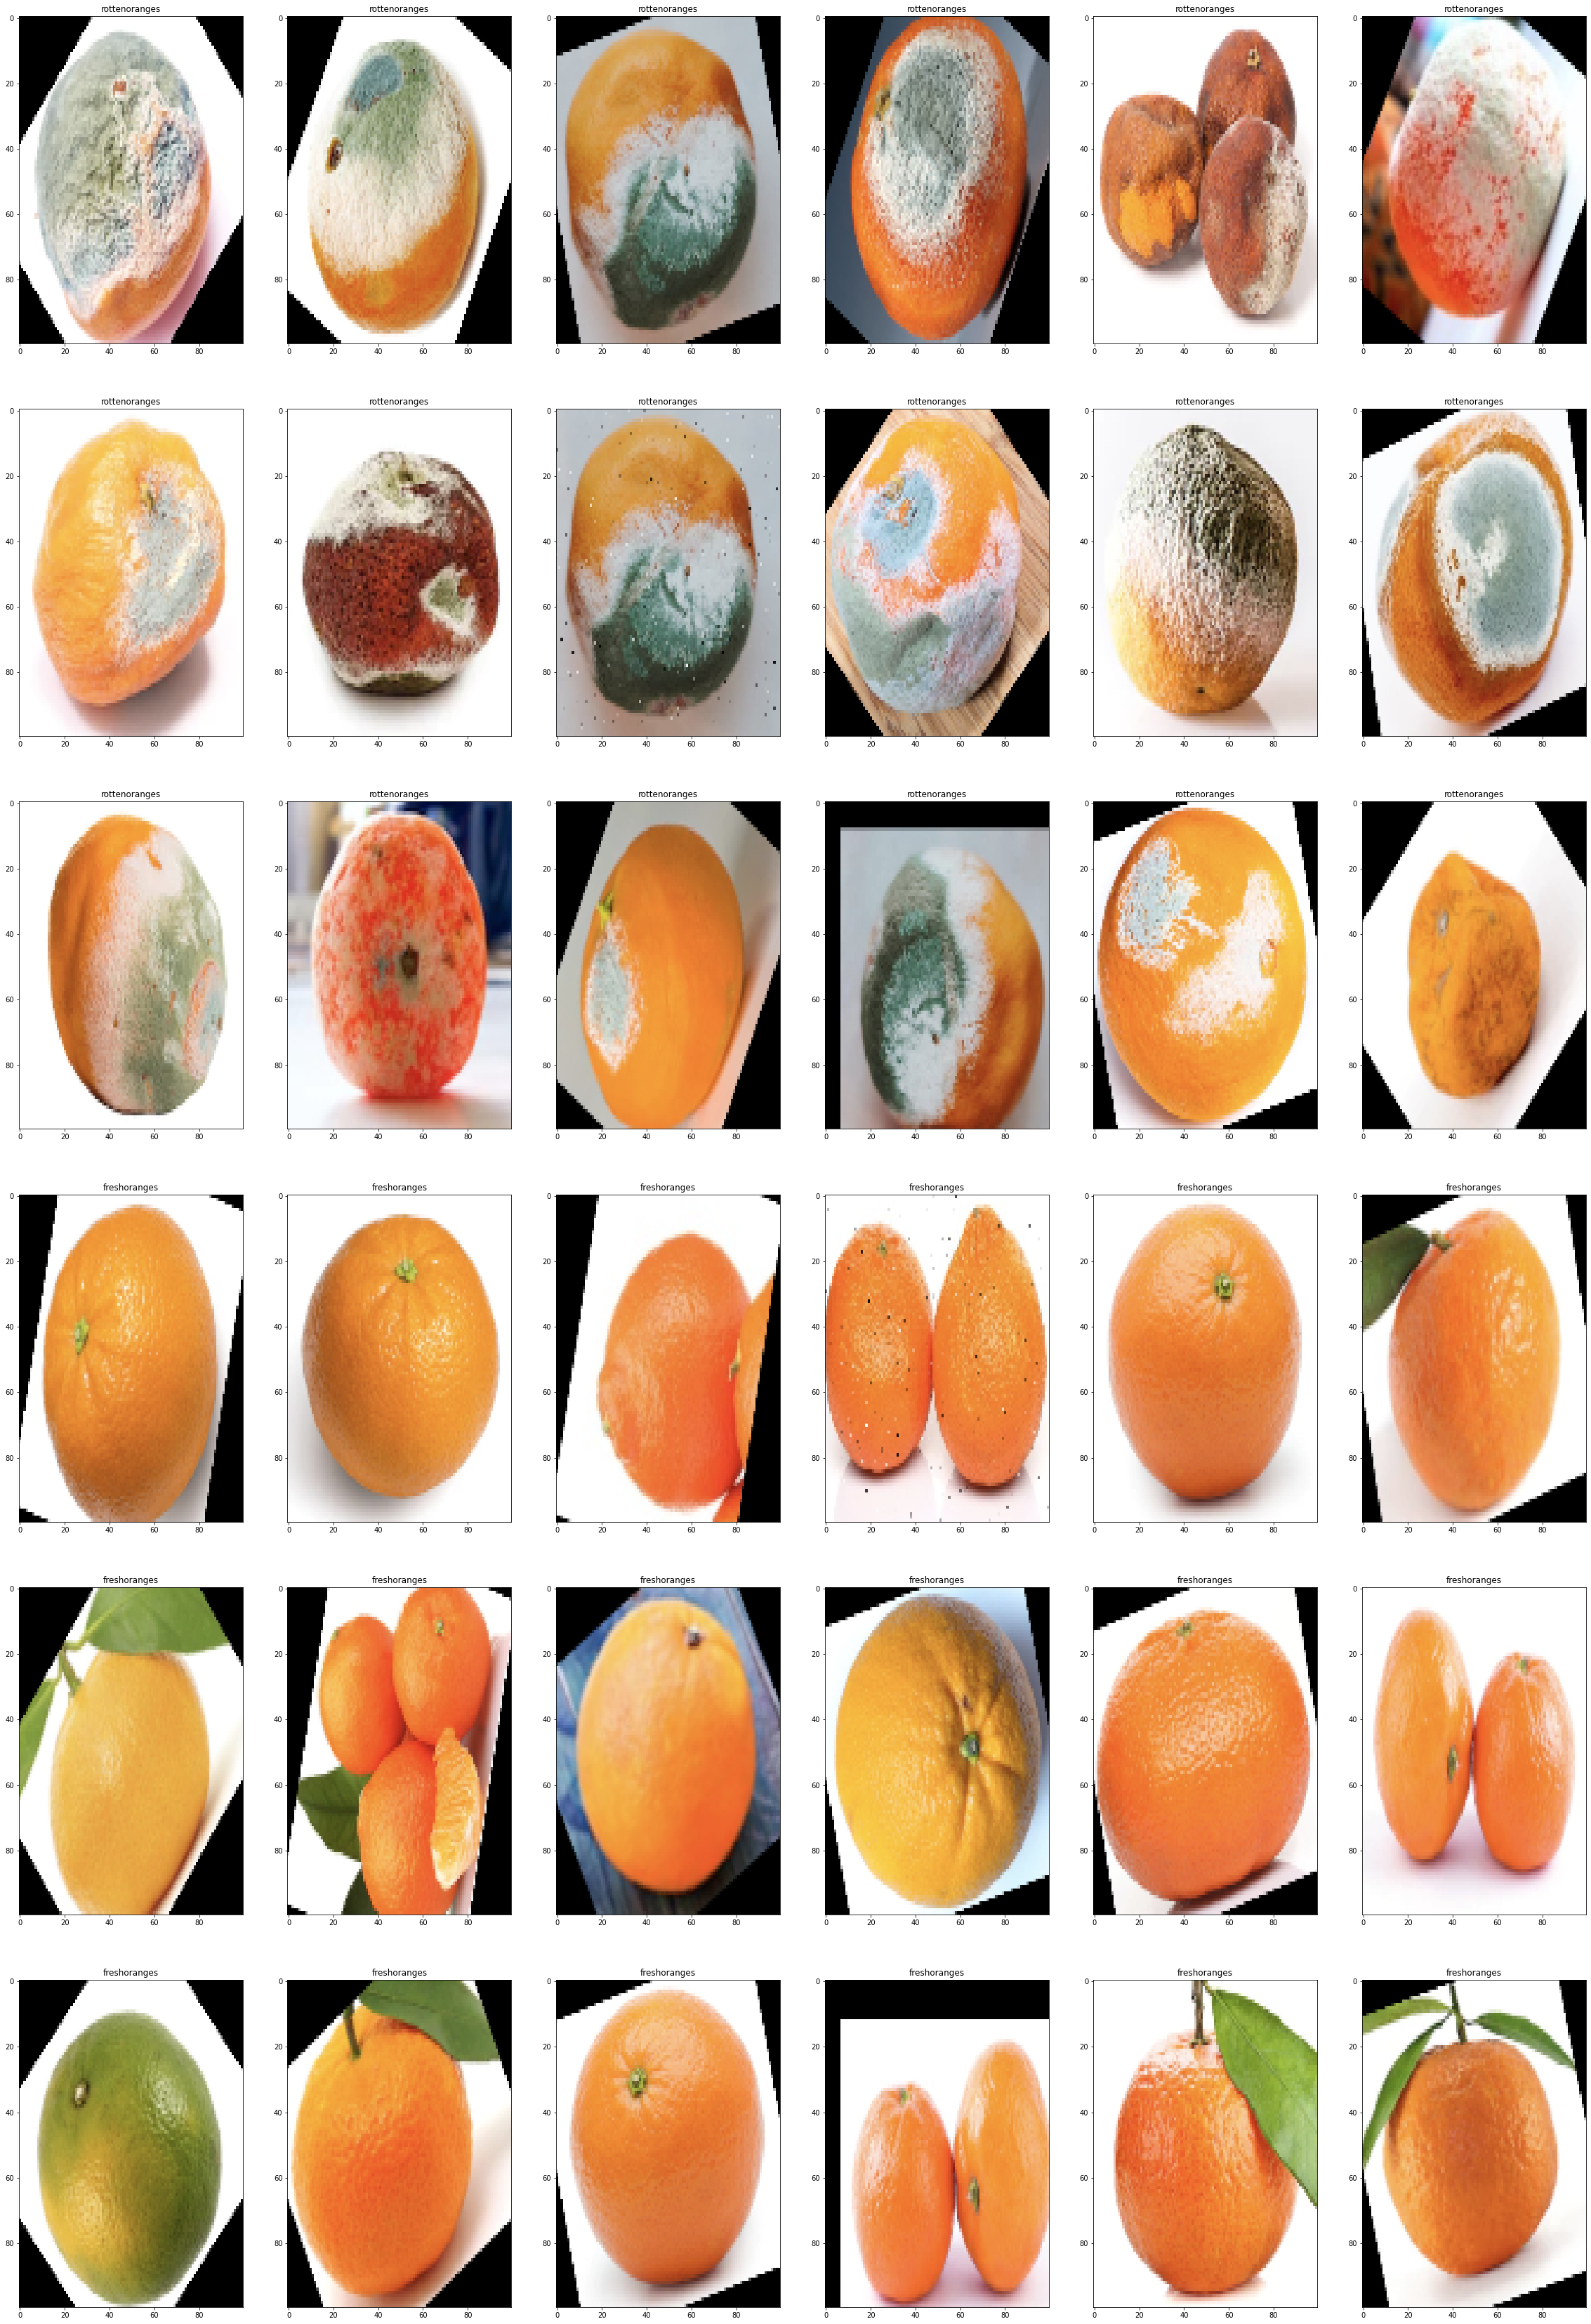

In [101]:
show_subpot(X)
#img = plt.imshow (X [1], aspect='auto')


In [32]:
del X

In [126]:
#Carrega as imagens e coloca labels para elas
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('./archive/dataset/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join('./archive/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0]) #fresh
        else:
            path_main=os.path.join('./archive/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1]) #rotten
    print('Shuffling your data.....')
    
    shuffle(z)
    for images, labels in tqdm(z):
        print(labels)
        X.append(images);Y.append(labels)
    return X,Y

In [127]:
X,Y=load_rottenvsfresh()


 52%|█████▏    | 1587/3061 [00:00<00:00, 15646.41it/s]

Shuffling your data.....
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
1
0
0
0
0
1
1
0
1
1
1
1
0
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
1
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1

100%|██████████| 3061/3061 [00:00<00:00, 15204.33it/s]

1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
1
0
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
1


In [128]:
Y=np.array(Y)
X=np.array(X)

In [129]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    1595
0    1466
dtype: int64

In [111]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('./archive/dataset/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join('./archive/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('./archive/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y      

In [112]:
X_val,Y_val=load_rottenvsfresh_valset()


100%|██████████| 795/795 [00:00<00:00, 1730395.27it/s]

Shuffling your data.....


In [113]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    406
0    389
dtype: int64

In [41]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [42]:
#Para construir o modelo, precisamos criar a arquitetura usando Sequential().

model = Sequential()

#Em seguida, adicionamos a primeira camada, uma camada de convolução para extrair 
#recursos da imagem de entrada e criamos 32 recursos convolutos 3 x 3 ReLu, 
#também conhecidos como mapas de recursos. Como esta é a primeira camada, devemos inserir a forma 
#da dimensão que é uma imagem de 100 x 100 pixels com profundidade = 3 (RGB).
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))

#A próxima camada será uma camada de pooling com um filtro de 2 x 2 pixels para obter o 
#elemento máximo dos mapas de feições. Isso reduz a dimensão dos mapas de recursos pela metade e 
#também é conhecido como subamostragem.
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#Crie mais uma camada de convolução e camada de agrupamento como antes, mas sem o input_shape.
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

#Adicione uma camada de achatamento para reduzir a imagem a uma matriz linear, 
#também conhecida como um vetor de dimensão única, para alimentar e conectar-se à rede neural.
model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))

#Agora crie uma rede neural onde a primeira camada tem 128 neurônios e a função de ativação ReLu .
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

#Adicione uma camada de drop out com 30% de drop out.
model.add(Dropout(0.3))

#Crie a última camada desta rede neural usando a função sigmoid .
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 64)        2

In [44]:
import tensorflow as tf


In [105]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)

check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='./rotten.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

#compile o modelo, binary_crossentropy pois sao apenas 2 classes, otimizador adam e a precisao do modelo como metrica
model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

NameError: name 'keras' is not defined

In [114]:
X=X/255.0
X_val=X_val/255.0

In [47]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 25,
                 callbacks=[check_point])

Epoch 1/25
154/154 [==============================] - ETA: 0s - loss: 0.6160 - accuracy: 0.8703
Epoch 00001: val_loss improved from inf to 11.57570, saving model to ./rotten.h5
154/154 [==============================] - 103s 670ms/step - loss: 0.6160 - accuracy: 0.8703 - val_loss: 11.5757 - val_accuracy: 0.4893
Epoch 2/25
154/154 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9271
Epoch 00002: val_loss did not improve from 11.57570
154/154 [==============================] - 102s 664ms/step - loss: 0.1974 - accuracy: 0.9271 - val_loss: 12.2643 - val_accuracy: 0.4893
Epoch 3/25
154/154 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9402
Epoch 00003: val_loss improved from 11.57570 to 8.80041, saving model to ./rotten.h5
154/154 [==============================] - 75s 488ms/step - loss: 0.1673 - accuracy: 0.9402 - val_loss: 8.8004 - val_accuracy: 0.5811
Epoch 4/25
154/154 [==============================] - ETA: 0s - loss: 0.1285 - accuracy:

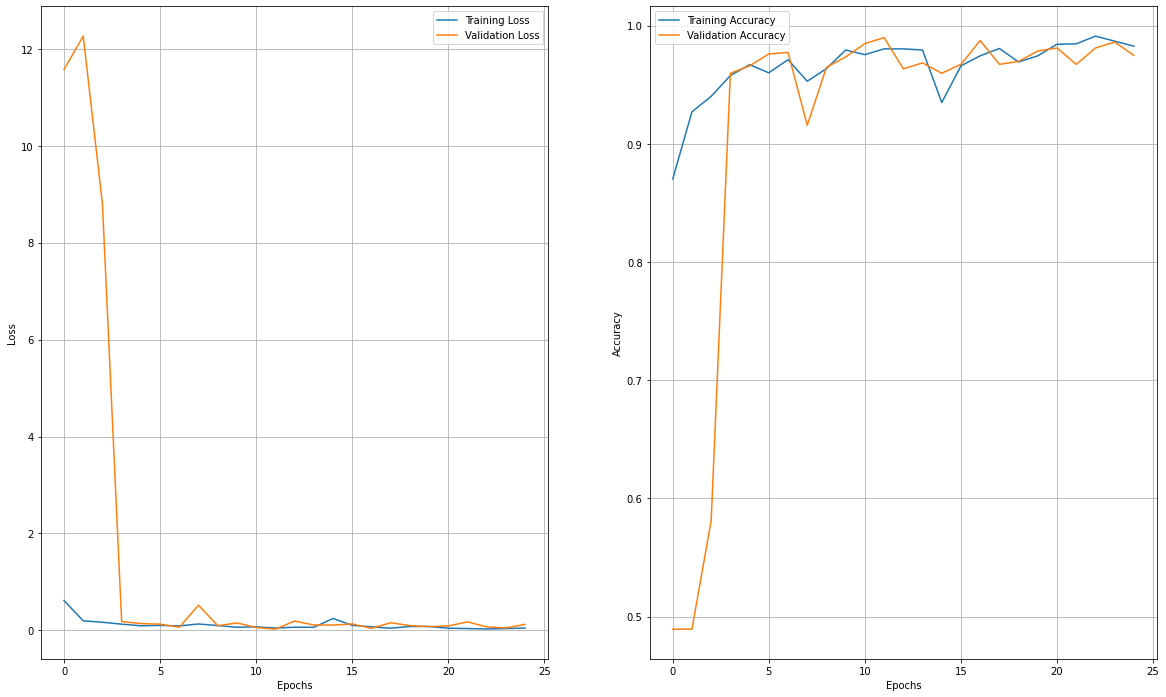

In [48]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [49]:
model.evaluate(X_val,Y_val)


25/25 [==============================] - 4s 157ms/step - loss: 0.1242 - accuracy: 0.9748


[0.12417136877775192, 0.9748427867889404]

In [50]:
model.save('./rottenvsfresh.h5')

In [115]:
from keras.models import Model, load_model


new_model=load_model('./rotten.h5')


In [116]:
new_model.evaluate(X_val,Y_val)


25/25 [==============================] - 2s 78ms/step - loss: 0.0252 - accuracy: 0.9899


[0.02524428255856037, 0.9899371266365051]

In [118]:
show_subpot(X_val[:4],title=True,Y=model.predict_classes(X_val[:4]))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Cannot plot


In [119]:
model.predict_classes(X_val[:4])

NameError: name 'model' is not defined